In [1]:
import logging
import numpy as np  
from gensim.models import LdaModel
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [3]:
from gensim import corpora, models, similarities

In [4]:
dictionary = corpora.Dictionary.load("/home/laampt/orm/10K/5K/lda/model/vi_newswire_700Kdoc.dict")
corpus = corpora.MmCorpus('/home/laampt/orm/10K/5K/lda/model/vi_newswire_700Kdoc.corpus.mm2')

INFO:gensim.utils:loading Dictionary object from /home/laampt/orm/10K/5K/lda/model/vi_newswire_700Kdoc.dict
INFO:gensim.corpora.indexedcorpus:loaded corpus index from /home/laampt/orm/10K/5K/lda/model/vi_newswire_700Kdoc.corpus.mm2.index
INFO:gensim.matutils:initializing corpus reader from /home/laampt/orm/10K/5K/lda/model/vi_newswire_700Kdoc.corpus.mm2
INFO:gensim.matutils:accepted corpus with 725617 documents, 779240 features, 134564182 non-zero entries


In [5]:
lda = LdaModel.load('/home/laampt/orm/10K/5K/lda/model/vinews_tok_doc700K_lda_bow_200topics_auto_50iterations_4workers_1passes_50iter_r130')

INFO:gensim.utils:loading LdaModel object from /home/laampt/orm/10K/5K/lda/model/vinews_tok_doc700K_lda_bow_200topics_auto_50iterations_4workers_1passes_50iter_r130
INFO:gensim.utils:loading id2word recursively from /home/laampt/orm/10K/5K/lda/model/vinews_tok_doc700K_lda_bow_200topics_auto_50iterations_4workers_1passes_50iter_r130.id2word.* with mmap=None
INFO:gensim.utils:loading expElogbeta from /home/laampt/orm/10K/5K/lda/model/vinews_tok_doc700K_lda_bow_200topics_auto_50iterations_4workers_1passes_50iter_r130.expElogbeta.npy with mmap=None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loading LdaModel object from /home/laampt/orm/10K/5K/lda/model/vinews_tok_doc700K_lda_bow_200topics_auto_50iterations_4workers_1passes_50iter_r130.state
INFO:gensim.utils:loading sstats from /home/laampt/orm/10K/5K/lda/model/vinews_tok_doc700K_lda_bow_200topics_auto_50iterations_4workers_1passes_50iter_r130.s

In [6]:
print dictionary
print corpus
print lda

Dictionary(779240 unique tokens: [u'Shigaraki-ky\u014d', u'cmays', u'spiders', u'Nampo', u'Do\xf1ana']...)
MmCorpus(725617 documents, 779240 features, 134564182 non-zero entries)
LdaModel(num_terms=779240, num_topics=200, decay=0.5, chunksize=2000)


In [7]:
s = u"""Phải thẳng_thắn công_nhận là những người dân Việt có cái may_mắn sống ở hải_ngoại nơi có môi_trường thuận_tiện hơn nơi có nhiều tự_do hơn để phát_triển về giáo_dục tri_thức kinh_tế và thông_tin phải có trách_nhiệm đứng ra gánh vách công_cuộc diệt sạch eradicate cộng_sản để phục_hưng đất_nước chứ không thể trông_cậy ở mấy ông trí_thức tiến_sĩ giáo_sư ở trong nước """
s_bow = dictionary.doc2bow(s.strip().split())
print s_bow

[(3, 1), (12, 2), (28, 1), (45, 1), (50, 1), (62, 1), (68, 1), (81, 4), (115, 1), (141, 3), (151, 1), (185, 1), (192, 1), (200, 1), (221, 1), (228, 1), (230, 1), (253, 2), (344, 2), (417, 1), (440, 1), (609, 1), (696, 1), (814, 1), (843, 1), (864, 1), (901, 1), (1102, 1), (1643, 1), (1788, 1), (1814, 1), (2017, 1), (2053, 1), (2296, 1), (2599, 1), (2739, 1), (4514, 1), (4551, 1), (4843, 1), (5345, 1), (5498, 1), (5728, 1), (6150, 1), (9426, 1), (11673, 1), (13005, 1), (13040, 1), (13792, 1), (27098, 1), (33562, 1), (69593, 1), (499906, 1)]


In [8]:
lda[s_bow]

[(9, 0.20316368130139026),
 (26, 0.020513270143173501),
 (29, 0.028378079509431418),
 (38, 0.13752825492226589),
 (59, 0.15061880502526007),
 (85, 0.018144860779652102),
 (90, 0.018246633869668186),
 (95, 0.031435967755149528),
 (116, 0.017318019785925981),
 (124, 0.020245255624217959),
 (126, 0.037149607106626827),
 (134, 0.13053214854390113),
 (160, 0.090855668180574847),
 (182, 0.011878129206535942),
 (190, 0.068827683768079947)]

In [15]:
lda.get_document_topics(s_bow)

[(9, 0.20377855346139861),
 (26, 0.020510377216817265),
 (29, 0.028417202181391571),
 (38, 0.13965785599733219),
 (59, 0.15117633888006557),
 (85, 0.018145070935657814),
 (90, 0.018246949919872264),
 (95, 0.031557928622849646),
 (116, 0.017312988143607114),
 (124, 0.020253246533236388),
 (126, 0.037151302651471423),
 (134, 0.13026711325538984),
 (160, 0.088046530272769957),
 (182, 0.011342701464426451),
 (190, 0.068971905985559398)]

In [16]:
lda.print_topics()

INFO:gensim.models.ldamodel:topic #88 (0.005): 0.150*lễ + 0.030*thày + 0.029*dịp + 0.028*từ_thiện + 0.028*nhà_thờ + 0.022*buổi + 0.022*Giáng_sinh + 0.021*nghèo + 0.017*dự + 0.017*Giáo_hoàng
INFO:gensim.models.ldamodel:topic #120 (0.005): 0.346*Nhật + 0.344*Nhật_Bản + 0.027*Abe + 0.011*chân_ga + 0.011*ùn + 0.011*hầm_hố + 0.010*thiệt + 0.007*Mày + 0.006*lô_cốt + 0.006*bung
INFO:gensim.models.ldamodel:topic #67 (0.005): 0.092*tấn + 0.089*mm + 0.060*thép + 0.040*nặng + 0.031*dài + 0.031*pháo + 0.027*bọc + 0.026*đuôi + 0.026*vỏ + 0.022*sắt
INFO:gensim.models.ldamodel:topic #54 (0.005): 0.376*Ấn_Độ + 0.221*chiếm + 0.091*toàn_quốc + 0.034*tổng_số + 0.034*Delhi + 0.009*Tamil + 0.008*phái_nữ + 0.007*dân_số + 0.006*Pradesh + 0.004*Bengal
INFO:gensim.models.ldamodel:topic #90 (0.005): 0.062*Thứ + 0.035*Thầy + 0.031*tín_đồ + 0.030*thập + 0.027*giáo + 0.023*Chúa + 0.021*cầu_nguyện + 0.020*Tuần_trước + 0.020*Tân_Phú + 0.019*tưởng_niệm
INFO:gensim.models.ldamodel:topic #97 (0.005): 0.034*và + 0.029*m

[u'0.150*l\u1ec5 + 0.030*th\xe0y + 0.029*d\u1ecbp + 0.028*t\u1eeb_thi\u1ec7n + 0.028*nh\xe0_th\u1edd + 0.022*bu\u1ed5i + 0.022*Gi\xe1ng_sinh + 0.021*ngh\xe8o + 0.017*d\u1ef1 + 0.017*Gi\xe1o_ho\xe0ng',
 u'0.346*Nh\u1eadt + 0.344*Nh\u1eadt_B\u1ea3n + 0.027*Abe + 0.011*ch\xe2n_ga + 0.011*\xf9n + 0.011*h\u1ea7m_h\u1ed1 + 0.010*thi\u1ec7t + 0.007*M\xe0y + 0.006*l\xf4_c\u1ed1t + 0.006*bung',
 u'0.092*t\u1ea5n + 0.089*mm + 0.060*th\xe9p + 0.040*n\u1eb7ng + 0.031*d\xe0i + 0.031*ph\xe1o + 0.027*b\u1ecdc + 0.026*\u0111u\xf4i + 0.026*v\u1ecf + 0.022*s\u1eaft',
 u'0.376*\u1ea4n_\u0110\u1ed9 + 0.221*chi\u1ebfm + 0.091*to\xe0n_qu\u1ed1c + 0.034*t\u1ed5ng_s\u1ed1 + 0.034*Delhi + 0.009*Tamil + 0.008*ph\xe1i_n\u1eef + 0.007*d\xe2n_s\u1ed1 + 0.006*Pradesh + 0.004*Bengal',
 u'0.062*Th\u1ee9 + 0.035*Th\u1ea7y + 0.031*t\xedn_\u0111\u1ed3 + 0.030*th\u1eadp + 0.027*gi\xe1o + 0.023*Ch\xfaa + 0.021*c\u1ea7u_nguy\u1ec7n + 0.020*Tu\u1ea7n_tr\u01b0\u1edbc + 0.020*T\xe2n_Ph\xfa + 0.019*t\u01b0\u1edfng_ni\u1ec7m',


In [17]:
final_topics = lda.print_topics(200, num_words=30)
for t in final_topics:
    print t

INFO:gensim.models.ldamodel:topic #0 (0.005): 0.069*Ferrari + 0.027*mini + 0.018*Berlusconi + 0.018*Yang + 0.018*Jolie + 0.018*Mini + 0.018*Angelina + 0.017*Koizumi + 0.016*nghỉ_hè + 0.014*sản_phụ + 0.014*vali + 0.013*Link + 0.012*áo_phông + 0.012*Jaguar + 0.012*Ocean + 0.010*Ozil + 0.010*tái_xuất + 0.009*cứu_sinh + 0.009*Ơ + 0.009*Yaris + 0.008*India + 0.008*Lim + 0.008*Giroud + 0.008*Hun + 0.008*Dell + 0.008*Jong + 0.008*Muller + 0.008*MT + 0.007*Jin + 0.007*Romeo
INFO:gensim.models.ldamodel:topic #1 (0.005): 0.236*lao_động + 0.130*công_nhân + 0.124*làm_việc + 0.041*việc_làm + 0.029*xã_hội + 0.028*thợ + 0.018*xuâ + 0.016*Camry + 0.014*Xã_hội + 0.014*công_nghiệp + 0.014*hưởng + 0.011*chế_độ + 0.010*đóng + 0.010*sang + 0.009*Innova + 0.009*Kyrgyzstan + 0.009*trợ_giá + 0.008*người + 0.006*của_công + 0.006*chủ + 0.006*tìm + 0.006*Uzbekistan + 0.006*gian_dối + 0.006*đi + 0.005*nhân + 0.005*Hebdo + 0.004*Petro + 0.004*Hợp_Điểm + 0.004*hoài_niệm + 0.004*quyền_lợi
INFO:gensim.models.ldamodel

0.069*Ferrari + 0.027*mini + 0.018*Berlusconi + 0.018*Yang + 0.018*Jolie + 0.018*Mini + 0.018*Angelina + 0.017*Koizumi + 0.016*nghỉ_hè + 0.014*sản_phụ + 0.014*vali + 0.013*Link + 0.012*áo_phông + 0.012*Jaguar + 0.012*Ocean + 0.010*Ozil + 0.010*tái_xuất + 0.009*cứu_sinh + 0.009*Ơ + 0.009*Yaris + 0.008*India + 0.008*Lim + 0.008*Giroud + 0.008*Hun + 0.008*Dell + 0.008*Jong + 0.008*Muller + 0.008*MT + 0.007*Jin + 0.007*Romeo
0.236*lao_động + 0.130*công_nhân + 0.124*làm_việc + 0.041*việc_làm + 0.029*xã_hội + 0.028*thợ + 0.018*xuâ + 0.016*Camry + 0.014*Xã_hội + 0.014*công_nghiệp + 0.014*hưởng + 0.011*chế_độ + 0.010*đóng + 0.010*sang + 0.009*Innova + 0.009*Kyrgyzstan + 0.009*trợ_giá + 0.008*người + 0.006*của_công + 0.006*chủ + 0.006*tìm + 0.006*Uzbekistan + 0.006*gian_dối + 0.006*đi + 0.005*nhân + 0.005*Hebdo + 0.004*Petro + 0.004*Hợp_Điểm + 0.004*hoài_niệm + 0.004*quyền_lợi
0.024*tư_vấn + 0.023*sẽ + 0.022*hoặc + 0.019*net + 0.019*mạng + 0.018*và + 0.018*vn + 0.017*trên + 0.016*cho + 0.015*th

In [18]:
%matplotlib inline

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns
import wordcloud

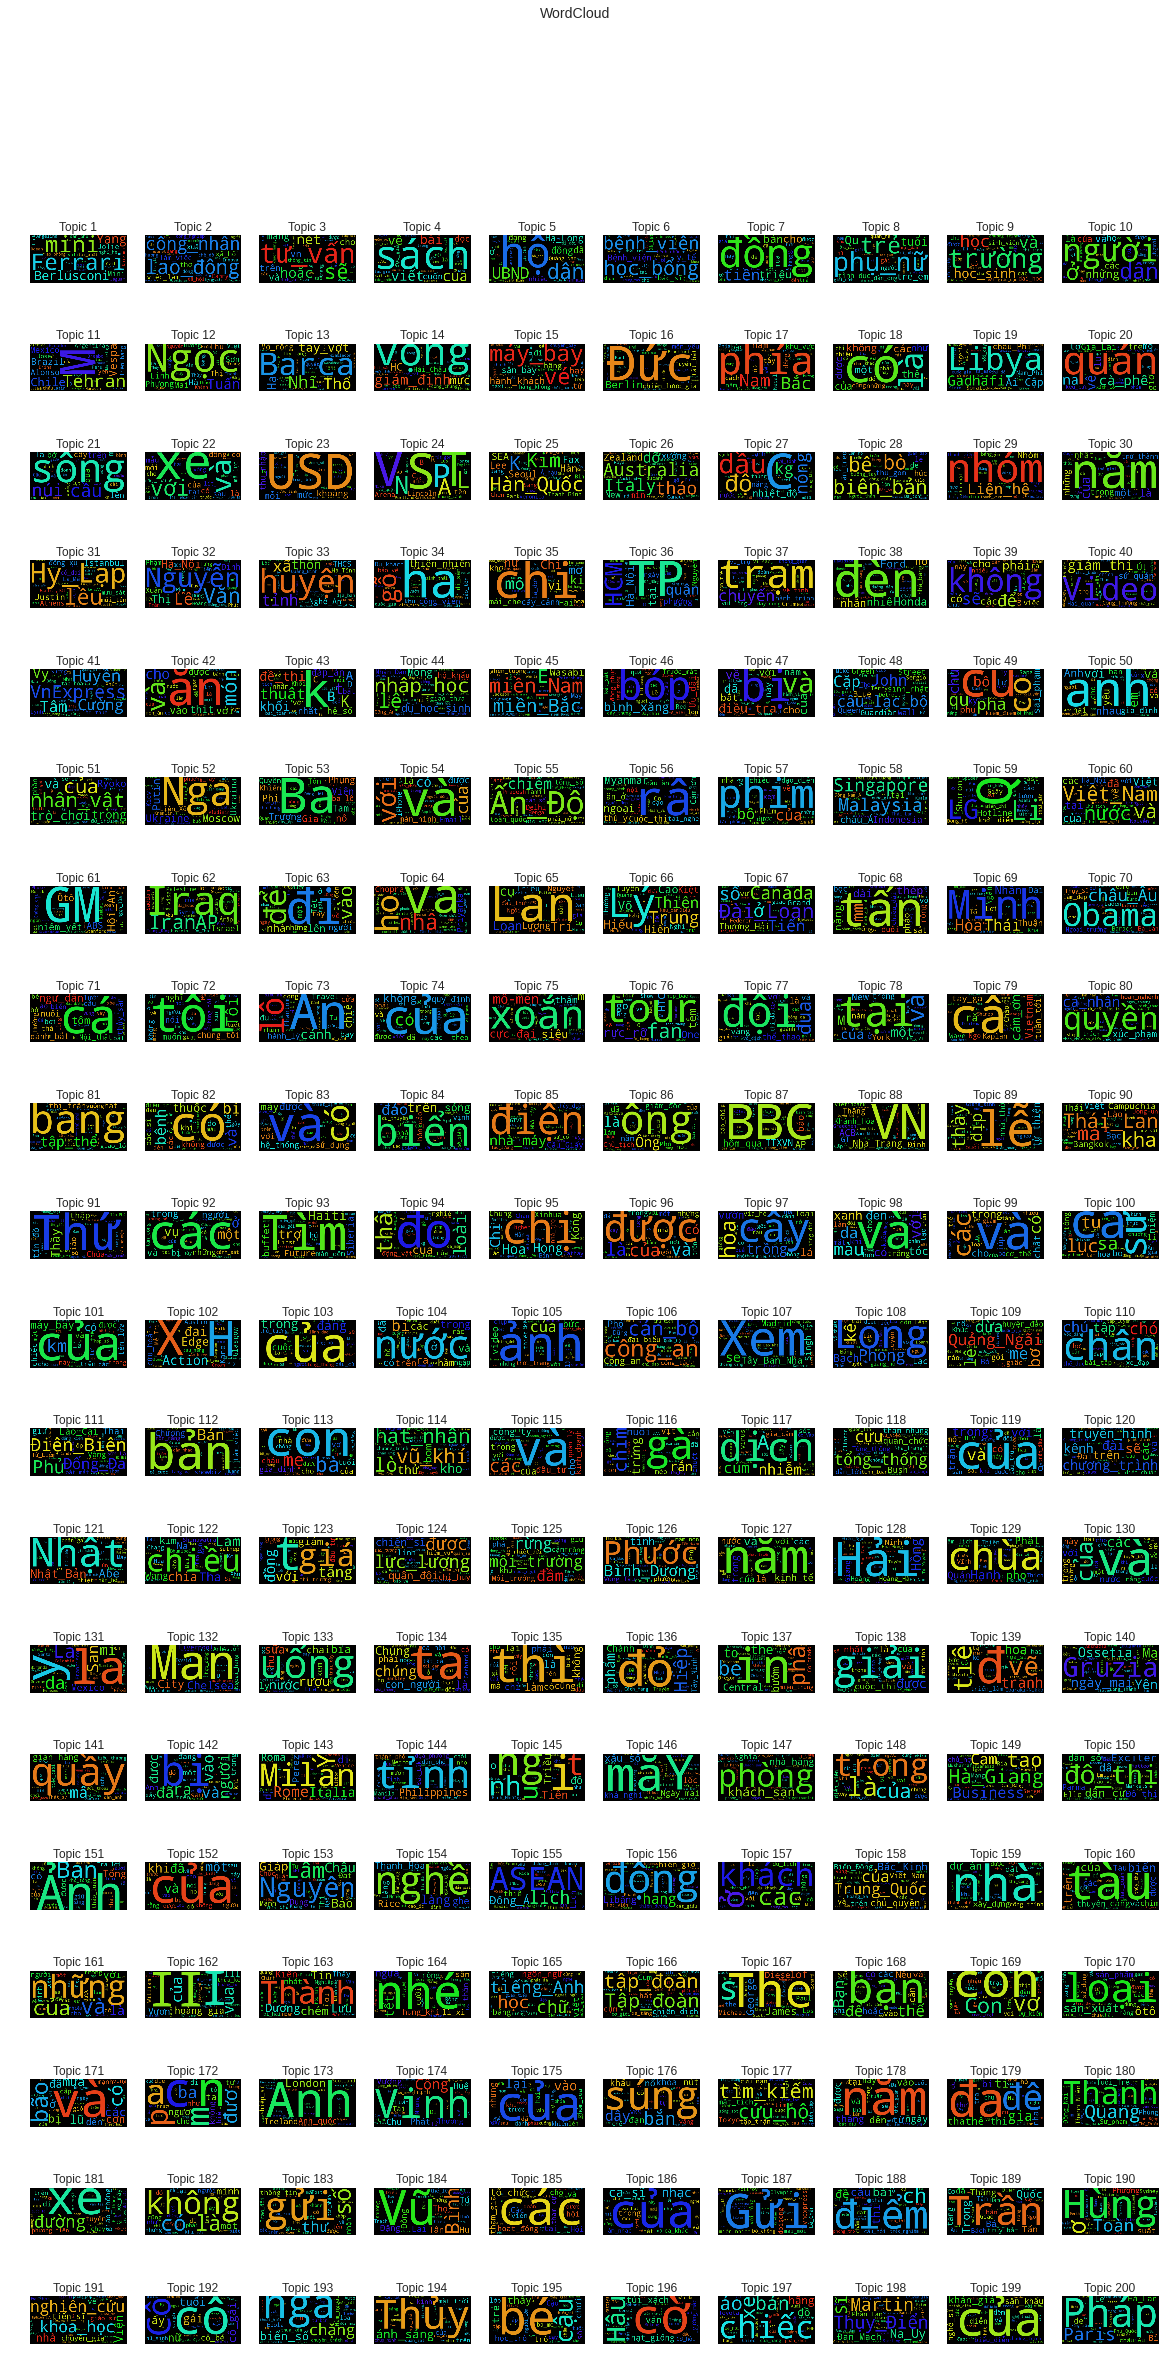

In [19]:
fix, ax = plt.subplots(figsize=(18, 36))
plt.suptitle('WordCloud')
for ii, line in enumerate(final_topics):
    line = line.strip()
    scores = [float(x.split("*")[0]) for x in line.split(" + ")]
    words = [x.split("*")[1] for x in line.split(" + ")]
    freqs = []
    for word, score in zip(words, scores):
        freqs.append((word, score))
    wc = wordcloud.WordCloud()
    wc.generate_from_frequencies(freqs)
    plt.subplot(20,10 , ii+1) # starts from 1
    plt.title("Topic {}".format(ii+1));
    plt.imshow(wc)
    plt.axis('off')

In [20]:
fix.savefig("/home/laampt/orm/10K/5K/lda/vinews_200topics_200dpi_r01.png", dpi=200 )

## X,y

In [21]:
STOPWORDS = []
with codecs.open("/home/laampt/orm/10K/5K/lda/stopwords.txt", encoding='utf-8', mode='r') as fin:
    STOPWORDS = fin.readlines()

class ViCorpus(object):
    def __init__(self, dictionary, datafile):
        self.dictionary = dictionary
        self.datafile = datafile
    def __iter__(self):
        for line in codecs.open(self.datafile, encoding='utf-8', mode='r'):
            words = line.replace('.',' ').strip().split()
            words = [w for w in words if not(w in STOPWORDS) and not(u"_NUM" in w) and not(w.startswith(u'-'))]
            yield self.dictionary.doc2bow(words)

In [22]:
print len(STOPWORDS), STOPWORDS[0]

694 all



In [23]:
black_corpus = ViCorpus(dictionary, "/home/laampt/orm/10K/5K/tok/PD.35Kdoc.50words.nodup2")

In [24]:
tm_black_corpus = lda[black_corpus]

In [25]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np

In [26]:
from gensim import matutils

In [27]:
pos_post = []
for ii, doc in enumerate(tm_black_corpus):
    pos_post.append(doc)

print len(pos_post)

35245


In [ ]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np

In [ ]:
v = DictVectorizer(sparse=False)

In [28]:
white_corpus = ViCorpus(dictionary, "/home/laampt/orm/10K/5K/tok/TN.VN.ZN.10Kdoc.txt.nodup")

In [29]:
tm_white_corpus = lda[white_corpus]

In [30]:
neg_post = []
for ii, doc in enumerate(tm_white_corpus):
    neg_post.append(doc)

print len(neg_post)

30000


In [31]:
N_NUM = 30000
pos_post_cut1 = pos_post[:N_NUM]

In [32]:
print pos_post_cut1[0]
print
print neg_post[0]

[(1, 0.0253694407885009), (2, 0.12064388941459359), (3, 0.15504287548227408), (8, 0.01520558036787506), (38, 0.031487429961063011), (76, 0.018209735790677143), (84, 0.013094900079029909), (102, 0.056768417388426966), (112, 0.058516129051467108), (119, 0.062207480285539012), (134, 0.14571934699806718), (173, 0.026088346620998834), (181, 0.12771633194313203), (184, 0.079073543670748064), (198, 0.043805521673194521)]

[(4, 0.08259549368258691), (6, 0.036318130097844868), (7, 0.01157753195787011), (9, 0.012400420415194258), (13, 0.011710752778400514), (23, 0.014624995004923732), (32, 0.016254305679610337), (33, 0.010412759795333562), (35, 0.090656750650185303), (59, 0.11079078716334029), (73, 0.03813557095940668), (81, 0.026802109743154702), (83, 0.010108765960845204), (86, 0.014498296018958972), (105, 0.081450066183232944), (114, 0.03849019594870165), (123, 0.033564190344800099), (126, 0.024620540613200008), (137, 0.038291433123818497), (143, 0.012150624592781744), (151, 0.019402652898851

In [33]:
def tuple_to_vect(tup, dim=200):
    vec = [0]*dim
    for k,v in tup:
        vec[k] = v
    return vec

In [34]:
pos_post_cut1_200 = [tuple_to_vect(t) for t in pos_post_cut1]
neg_post_200 = [tuple_to_vect(t) for t in neg_post]

print len(pos_post_cut1_200), len(neg_post_200)

30000 30000


In [35]:
pos_post_cut2 = pos_post[N_NUM:]
pos_post_cut2_200 = [tuple_to_vect(t) for t in pos_post_cut2]

In [36]:
N_TRAIN = 25000
X = np.vstack((np.array(pos_post_cut1_200[:N_TRAIN]), np.array(neg_post_200[:N_TRAIN])))
y = np.hstack((np.ones(N_TRAIN), np.zeros(N_TRAIN)))

print X.shape, y.shape

(50000, 200) (50000,)


In [37]:
X_test = np.vstack((np.array(pos_post_cut1_200[N_TRAIN:]), np.array(neg_post_200[N_TRAIN:])))
y_test = np.hstack((np.ones(len(pos_post_cut1_200) - N_TRAIN), np.zeros(len(neg_post_200) - N_TRAIN)))
print X_test.shape, y_test.shape

(10000, 200) (10000,)


# EDA

In [38]:
columns = ["D_{:02d}".format(i+1) for i in range(200)]
df = pd.DataFrame.from_records(X, columns=columns)

In [39]:
df.head()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
0,0,0.025369,0.120644,0.155043,0,0,0,0,0.015206,0.000000,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0.031487,0,0,0.000000,0,0,0,0,0.00000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01821,0,0,0,0,0.000000,0,0,0.013095,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0,0.056768,0,0.000000,0.000000,0,0,0,0,0,0,0.058516,0,0,0,0,0,0,0.062207,0,0,0,0.000000,0,0,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.145719,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.026088,0,0,0,0,0,0,0,0.127716,0,0,0.079074,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.043806,0
1,0,0.000000,0.018500,0.000000,0,0,0,0,0.000000,0.092945,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0.078351,0,0,0.000000,0,0,0,0,0.00000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0.018429,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0,0,0,0,0.058279,0,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0,0,0,0.018209,0,0,0,0,0,0,0.000000,0,0,0,0.000000,0,0,0.017802,0,0,0.014880,0.000000,0,0,0.015747,0.093634,0,0,0,0,0,0,0.027167,0,0,0,0,0,0,0,0,0,0.028432,0,0,0,0,0,0,0,0,0.189693,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.260791,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.000000,0
2,0,0.011379,0.051155,0.000000,0,0,0,0,0.000000,0.038813,0,0,0,0,0,0,0,0.065798,0,0,0,0,0,0,0,0,0,0,0,0.076368,0,0,0,0,0,0.000000,0,0,0.000000,0,0,0.029394,0,0,0,0,0.01413,0,0.010904,0,0,0,0,0,0,0,0,0,0,0.066880,0,0,0.025895,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0,0,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0.041006,0,0,0,0,0.000000,0,0.000000,0.015312,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0.000000,0,0,0,0.000000,0,0,0.101308,0,0,0.025149,0.000000,0,0,0.000000,0.127863,0,0,0,0,0,0,0.016374,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.173176,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.000000,0
3,0,0.000000,0.053939,0.000000,0,0,0,0,0.000000,0.109875,0,0,0,0,0,0,0,0.059866,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0,0,0.01616,0,0.012542,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0,0,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0,0,0,0.017583,0,0,0.000000,0.000000,0,0,0,0,0.000000,0,0.012261,0.000000,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0.000000,0,0,0,0.000000,0,0,0.000000,0,0,0.067184,0.013644,0,0,0.000000,0.264891,0,0,0,0,0,0,0.052610,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.250971,0,0,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.000000,0
4,0,0.000000,0.029366,0.000000,0,0,0,0,0.000000,0.033110,0,0,0,0,0,0,0,0.069227,0,0,0,0,0,0,0,0,0,0,0,0.044612,0,0,0,0,0,0.014654,0,0,0.033605,0,0,0.013639,0,0,0,0,0.00000,0,0.016570,0,0,0,0,0,0,0,0,0,0,0.0

In [40]:
df.describe()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.000353,0.001169,0.008846,0.007956,0.004776,0.001701,0.014919,0.002657,0.014511,0.013753,0.000824,0.005957,0.000330,0.000337,0.002733,0.000730,0.001339,0.066891,0.000459,0.000471,0.002499,0.007012,0.000861,0.000768,0.000869,0.000357,0.002288,0.000313,0.000687,0.019727,0.000450,0.008325

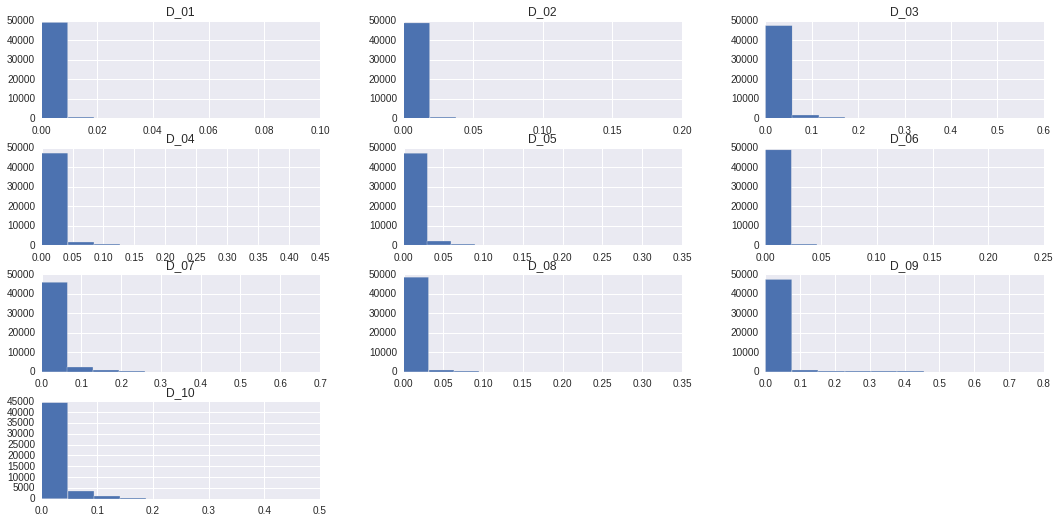

In [41]:
df[columns[:10]].hist(figsize=(16,8))
plt.show()

In [42]:
df['target'] = y

In [43]:
corr = df.corr()['target'][df.corr()['target'] < 1].abs()
corr.sort(ascending=False)
corr.head()

D_135    0.335611
D_18     0.255513
D_134    0.225889
D_60     0.216051
D_30     0.206737
Name: target, dtype: float64

In [44]:
def stratified_cv3(X, y, clf, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return clf

## TRAIN

In [ ]:
lr = linear_model.LogisticRegression()
rf = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=127)
svc = svm.LinearSVC(random_state=127)

cls = [lr, rf, svc]
cls_names = ["Logistic Regression", "Random Forest", "Support Vector Machines"]

print "[*] CV on 10 folds"
for i, clf in enumerate(cls):
    print "CV on {}".format(cls_names[i])
    cls[i] = stratified_cv3(X,y, clf)

In [ ]:
print "[*] Score of CV on 10 folds"
for i, clf in enumerate(cls):
    print('{}:           {:.2f}\n'.format(cls_names[i], metrics.accuracy_score(y, cls[i].predict(X))))

In [45]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(lr, "/home/laampt/orm/10K/5K/lda/model/lr_30Ktrain_cv10_200topics_r101.pkl")
joblib.dump(rf, "/home/laampt/orm/10K/5K/lda/model/rf_30Ktrain_cv10_200topics_r101.pkl")
joblib.dump(svc, "/home/laampt/orm/10K/5K/lda/model/svc_30Ktrain_cv10_200topics_r101.pkl")

## LOAD

In [46]:
lr =  joblib.load("/home/laampt/orm/10K/5K/lda/model/lr_30Ktrain_cv10_200topics_r101.pkl")
rf =  joblib.load("/home/laampt/orm/10K/5K/lda/model/rf_30Ktrain_cv10_200topics_r101.pkl")
svc = joblib.load("/home/laampt/orm/10K/5K/lda/model/svc_30Ktrain_cv10_200topics_r101.pkl")

In [47]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test, lr.predict(X_test))))
print('Random Forest:\n {}\n'.format(metrics.classification_report(y_test, rf.predict(X_test))))
print('Linear SVM:\n {}\n'.format(metrics.classification_report(y_test, svc.predict(X_test))))

Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.88      0.92      0.90      5000
        1.0       0.92      0.87      0.89      5000

avg / total       0.90      0.89      0.89     10000


Random Forest:
              precision    recall  f1-score   support

        0.0       0.93      0.97      0.95      5000
        1.0       0.97      0.92      0.95      5000

avg / total       0.95      0.95      0.95     10000


Linear SVM:
              precision    recall  f1-score   support

        0.0       0.91      0.96      0.93      5000
        1.0       0.95      0.90      0.93      5000

avg / total       0.93      0.93      0.93     10000




## Sanity check

In [68]:
import re 
import string
import unicodedata
import sys
import codecs

STOPWORDS = [u"wwDATEww", u"wwTIMEww", u"wwEMAILww", u"wwIPww", u"wwURLww", u"wwNUMBERww"]
with codecs.open("/home/laampt/orm/10K/5K/lda/stopwords.txt", encoding='utf-8', mode='r') as fin:
        STOPWORDS += fin.readlines()
        
tbl = dict.fromkeys(i for i in xrange(sys.maxunicode)
                      if unicodedata.category(unichr(i)).startswith('P') and i != 45 and i!= 95)

def vi_trans_unicode(su):
    return su.translate(tbl)

vpunctuation = string.punctuation.replace('-','').replace('_','')
print vpunctuation

def vi_strip_text(s):
    s = re.sub(r"&amp;", "", s)
    s = re.sub(u"\u2026", "", s, re.UNICODE) # ...
    s = re.sub(u"\u2014", "", s, re.UNICODE) # emdash
    s = re.sub(u"\u201d", "", s, re.UNICODE) #
    s = re.sub(u"\u201c", "", s, re.UNICODE) #
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub("([%s]+)" % vpunctuation, " ", s)
    s = ' '.join([w if not w[0].isdigit() else u"_NUM" for w in s.strip().split()])
    return s

def vi_strip_text2(s):
    s = re.sub(r"&amp;", "", s)
    s = vi_trans_unicode(s)
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub(r"__+", "_", s)
    s = re.sub(r"--+", "-", s)
    s = ' '.join([w if not w[0].isdigit() else u"_NUM" for w in s.strip().split()])
    return s

def vi_clean(line):
    words = line.replace('.',' ').strip().split()
    words = [w for w in words if not(u"_NUM" in w) and not(w.startswith(u'-'))]
    return ' '.join(words)

def vi_clean2(line):
    words = line.replace('.',' ').strip().split()
    words = [w for w in words if not (w in STOPWORDS) and not(u"_NUM" in w) and not(w.startswith(u'-'))]
    return ' '.join(words)

import requests
from bs4 import BeautifulSoup

url_post = "http://vlsp.vietlp.org:8080/demo/?page=seg_pos_chunk"
header_post = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/4",
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8"
}

def tokenize_soup(soup):
    try:
        sentences = soup.findAll('div', {'class': "sentence"})
        toks = [ s.find('tr').findAll('td')[1:] for s in sentences]
        toks = [t.contents[0] for tok in toks for t in tok]
        return ' '.join(toks)
    except Exception, e:
        print e
        
def get_tokens(INPUT):
    try:
        payload = {r"input":INPUT}
        rsp = requests.post(url_post, data=payload, headers=header_post)
        soup = BeautifulSoup(rsp.content)
        return tokenize_soup(soup)
    except Exception, e:
        print e

!"#$%&'()*+,./:;<=>?@[\]^`{|}~


In [50]:
INPUT = u"""Nguỵ biện nói cho cùng là vấn đề chân lí và sự thật. Vấn đề ở VN là chân lí nó được bóp méo và vặn vẹo làm cho người dân nghĩ rằng chỉ có một chân lí duy nhất. Quan sát trên báo chí, internet, đến nghị trường, từ những người có học (cỡ sư sĩ), đến chính khách, và cả thường dân ai ai cũng dùng những lí lẽ mà họ không biết là lỗi nguỵ biện. Chẳng hạn như gần đây nhất có người cảnh báo rằng coi chừng lợi dụng dân chủ, nhưng trong thực tế đó cũng là một dạng của nguỵ biện – nguỵ biện dựa vào nguồn tin vu vơ. Còn sự thật thì cũng bị giả tạo và giả dối sản sinh (như vụ Lê Văn Tám). Những thói nguỵ biện nó được xây dựng trên sự dối trá đã được tạo ra quá lâu, nên khó có thể chỉnh sửa một sớm một chiều. Chỉ khi nào nền giáo dục có sự tham gia bình đẳng từ các nhóm xã hội, thay vì bị sự kiểm soát của một thế lực chính trị, thì tình trạng nguỵ biện vẫn còn."""
test_doc = vi_clean2(get_tokens(INPUT))
test_bow = dictionary.doc2bow(test_doc.split())
test_tm = lda[test_bow]

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): vlsp.vietlp.org
DEBUG:requests.packages.urllib3.connectionpool:"POST /demo/?page=seg_pos_chunk HTTP/1.1" 200 None
/home/laampt/ds/local/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


In [51]:
test_vec = tuple_to_vect(test_tm)

In [52]:
def voting_vec4(test_vec, cls):
    names = [type(clf).__name__ for clf in cls]
    scores = [clf.predict(test_vec) for clf in cls]
    return zip(names,scores)

In [54]:
cls = [lr, rf, svc]

In [55]:
voting_vec4(test_vec, cls)

[('LogisticRegression', array([ 1.])),
 ('RandomForestClassifier', array([ 1.])),
 ('LinearSVC', array([ 1.]))]

In [56]:
INPUT = u"""Nhiều công_dân chỉ vì vi_phạm_luật đi_đường mà đã bị công_an cảnh_sát hành_hung gây_thương_tích làm vong_mạng nh
ư trường_hợp ông Trịnh Xuân Tùng tại_Hà_Nội nhiều công_dân chỉ vì dính_dáng đến một vụ hình_sự mà bị gọi đến đồn để rồi phải chịu tra_tấn đến chết dưới b
àn_tay các điều_tra_viên như trường_hợp anh Nguyễn_Công_Nhựt tại Bình_Dương. Cho đến nay các vụ_việc này vẫn chưa_được đưa ra ánh_sáng và xét_xử thích_hợ
p. Nhiều phiên_tòa đặc_biệt các phiên_tòa chính_trị đã được tiến_hành trong sự vi_phạm các thủ_tục_pháp_lý như bịt_miệng bị_cáo chặn lời luật_sư không tr
ưng dẫn bằng_chứng theo_yêu_cầu chẳng cho thân_nhân báo_chí quần_chúng tham_dự thậm chí còn hành_hung những ai muốn đến chứng_kiến quy_chụp tội_danh cách
 bất_công và tuyên những bản_án nặng_nề như tại phiên tòa_phúc_thẩm xử luật_gia Cù_Huy_Hà_Vũ wwDATEww và phiên tòa_sơ_thẩm xử hai tín_đồ Hòa_Hảo Nguyễn V
ăn Lía và Trần Hoài_Ân wwDATEww. Nhiều công_dân bị_bắt công_khai tại gia_đình hay bí_mật trên_đường phố nhưng không hề có lệnh của viện_kiểm_sát không th
ông_báo cho thân_nhân về ngày_giờ nơi_chốn và lý_do giam_giữ không cho gặp luật_sư và gia_đình trong thời_gian thẩm_vấn theo như luật_định như trường_hợp
 cô Tạ Phong Tần và wwNUMBERww thanh_niên_Công_giáo tại Nghệ_An và Thanh_Hóa. . Các nhà đối_kháng dân_chủ tiếp_tục bị hăm_dọa sách_nhiễu tống_ngục chỉ vì
 dám lên_tiếng phê_phán những sai_lầm và tố_cáo những tội_ác của nhà_cầm_quyền_Cộng_sản. Điển_hình là nhà_báo tự_do Nguyễn_Hoàng Hải tiếp_tục bị_giam sau
 khi mãn án_tù và nay biệt vô âm_tín giáo_sư hồi_hương"""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_bow = dictionary.doc2bow(test_doc.split())
test_tm = lda[test_bow]
test_vec = tuple_to_vect(test_tm)
voting_vec4(test_vec, cls)

[('LogisticRegression', array([ 1.])),
 ('RandomForestClassifier', array([ 1.])),
 ('LinearSVC', array([ 1.]))]

## Eva

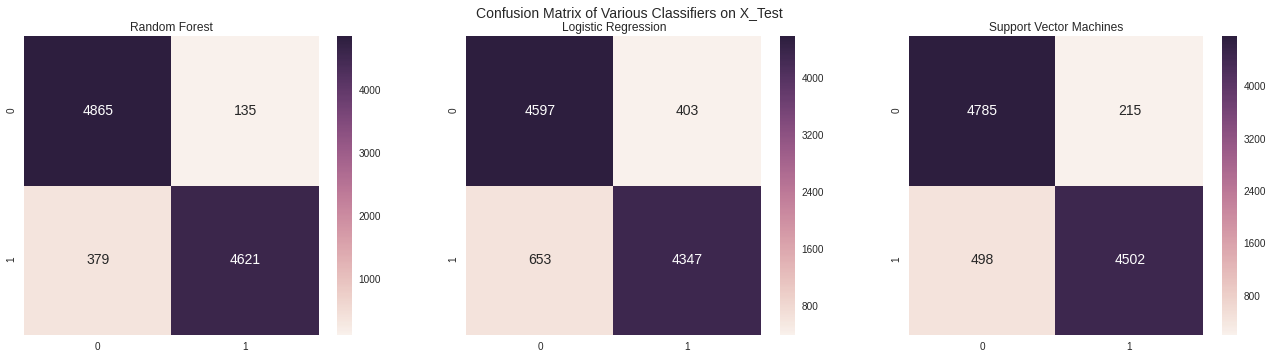

In [57]:
random_forest_conf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
logistic_reg_conf_matrix = metrics.confusion_matrix(y_test, lr.predict(X_test))
svm_svc_conf_matrix = metrics.confusion_matrix(y_test, svc.predict(X_test))

conf_matrix = {
                1: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                2: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                3: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machines',
                   }
}

fix, ax = plt.subplots(figsize=(20, 5))
plt.suptitle('Confusion Matrix of Various Classifiers on X_Test ')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(1, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

In [58]:
print "AUC of LR: {}, RF: {}, SVC: {}".format(metrics.roc_auc_score(y_test, lr.predict(X_test)),
                                              metrics.roc_auc_score(y_test, rf.predict(X_test)),
                                              metrics.roc_auc_score(y_test, svc.predict(X_test))
                                             )

AUC of LR: 0.8944, RF: 0.9486, SVC: 0.9287


## Testing on 5K remaining

In [59]:
X_test_5K = np.array(pos_post_cut2_200)
y_test_5K = np.ones(len(pos_post_cut2_200))
print X_test_5K.shape, y_test_5K.shape

(5245, 200) (5245,)


In [60]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test_5K, lr.predict(X_test_5K))))
print('Random Forest:\n {}\n'.format(metrics.classification_report(y_test_5K, rf.predict(X_test_5K))))
print('Linear SVM:\n {}\n'.format(metrics.classification_report(y_test_5K, svc.predict(X_test_5K))))

Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       1.00      0.86      0.92      5245

avg / total       1.00      0.86      0.92      5245


Random Forest:
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       1.00      0.93      0.96      5245

avg / total       1.00      0.93      0.96      5245


Linear SVM:
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       1.00      0.89      0.94      5245

avg / total       1.00      0.89      0.94      5245




/home/laampt/ds/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
results = []
for i, vec in enumerate(pos_post_cut2_200):
    if i % 100 == 0: print "[*] Progess at ", i
    results.append(voting_vec4(vec, cls))

In [ ]:
results_lite = [(r[0][1][0], r[1][1][0], r[2][1][0]) for r in results]

In [ ]:
df_result = pd.DataFrame.from_records(np.asarray(results_lite), columns=["LR", "RF", "SVC"])
df_result.describe()

## Export X_test for Viz

In [ ]:
import cPickle

In [ ]:
cPickle.dump(X_test, open('/home/laampt/orm/10K/5K/lda/out/X_test.pkl', 'wb'))

## Benchmark

In [75]:
INPUT = u"""Nhiều công_dân chỉ vì vi_phạm_luật đi_đường mà đã bị công_an cảnh_sát hành_hung gây_thương_tích làm vong_mạng nh
ư trường_hợp ông Trịnh Xuân Tùng tại_Hà_Nội nhiều công_dân chỉ vì dính_dáng đến một vụ hình_sự mà bị gọi đến đồn để rồi phải chịu tra_tấn đến chết dưới b
àn_tay các điều_tra_viên như trường_hợp anh Nguyễn_Công_Nhựt tại Bình_Dương. Cho đến nay các vụ_việc này vẫn chưa_được đưa ra ánh_sáng và xét_xử thích_hợ
p. Nhiều phiên_tòa đặc_biệt các phiên_tòa chính_trị đã được tiến_hành trong sự vi_phạm các thủ_tục_pháp_lý như bịt_miệng bị_cáo chặn lời luật_sư không tr
ưng dẫn bằng_chứng theo_yêu_cầu chẳng cho thân_nhân báo_chí quần_chúng tham_dự thậm chí còn hành_hung những ai muốn đến chứng_kiến quy_chụp tội_danh cách
 bất_công và tuyên những bản_án nặng_nề như tại phiên tòa_phúc_thẩm xử luật_gia Cù_Huy_Hà_Vũ wwDATEww và phiên tòa_sơ_thẩm xử hai tín_đồ Hòa_Hảo Nguyễn V
ăn Lía và Trần Hoài_Ân wwDATEww. Nhiều công_dân bị_bắt công_khai tại gia_đình hay bí_mật trên_đường phố nhưng không hề có lệnh của viện_kiểm_sát không th
ông_báo cho thân_nhân về ngày_giờ nơi_chốn và lý_do giam_giữ không cho gặp luật_sư và gia_đình trong thời_gian thẩm_vấn theo như luật_định như trường_hợp
 cô Tạ Phong Tần và wwNUMBERww thanh_niên_Công_giáo tại Nghệ_An và Thanh_Hóa. . Các nhà đối_kháng dân_chủ tiếp_tục bị hăm_dọa sách_nhiễu tống_ngục chỉ vì
 dám lên_tiếng phê_phán những sai_lầm và tố_cáo những tội_ác của nhà_cầm_quyền_Cộng_sản. Điển_hình là nhà_báo tự_do Nguyễn_Hoàng Hải tiếp_tục bị_giam sau
 khi mãn án_tù và nay biệt vô âm_tín giáo_sư hồi_hương"""
test_doc = vi_clean2(vi_strip_text2(INPUT))
test_bow = dictionary.doc2bow(test_doc.split())
test_tm = lda[test_bow]
test_vec = tuple_to_vect(test_tm)

In [77]:
%timeit lda[test_bow]

100 loops, best of 3: 4.61 ms per loop


In [78]:
%timeit lr.predict_proba(test_vec)

The slowest run took 11.62 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 38.9 µs per loop


In [79]:
%timeit rf.predict_proba(test_vec)

10 loops, best of 3: 126 ms per loop


In [80]:
%timeit svc.predict(test_vec)

The slowest run took 7.75 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 30.8 µs per loop


In [82]:
%load_ext memory_profiler

In [85]:
%memit lda[test_bow]

peak memory: 4055.82 MiB, increment: 0.05 MiB


In [86]:
%memit lr.predict_proba(test_vec)

peak memory: 4055.96 MiB, increment: 0.01 MiB


In [87]:
%memit rf.predict_proba(test_vec)

peak memory: 4055.98 MiB, increment: 0.02 MiB


In [88]:
%memit svc.predict(test_vec)

peak memory: 4055.96 MiB, increment: 0.00 MiB


> So far, models run it milisec, peak mem 4GB, increment ~ 0.05 MiB